In [43]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph
from micrograd.nn import Neuron
from micrograd.engine import Value

In [44]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:               
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{data %.4f | grad %.4f }" % ( n.data, n.grad), shape="record")
    
        if n._op:
            dot.node(uid + n._op, n._op) 
            
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


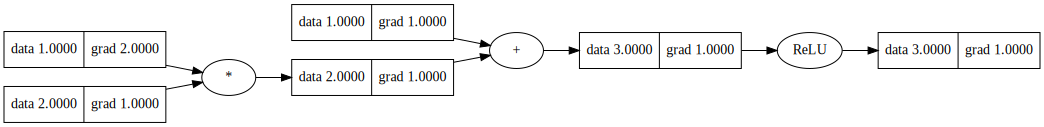

In [45]:
# a very simple example
x = Value(1.0)

y = (x * 2 + 1).relu()

y.backward()
dot = draw(y)
dot

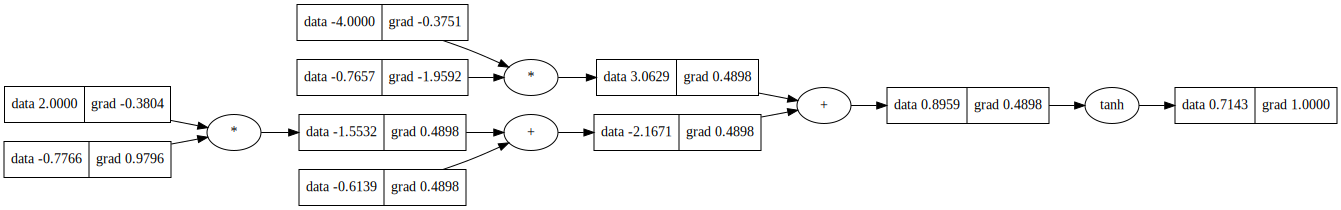

In [46]:
# simple neuron that takes 2D input, applying w*x + b, then activate with .tanh()
x = [Value(2.0), Value(-4.0)]


n = Neuron(2)
y = n(x)


y.backward()
dot = draw(y)
dot

In [47]:
dot.render('graph-trace')

'graph-trace.svg'